In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

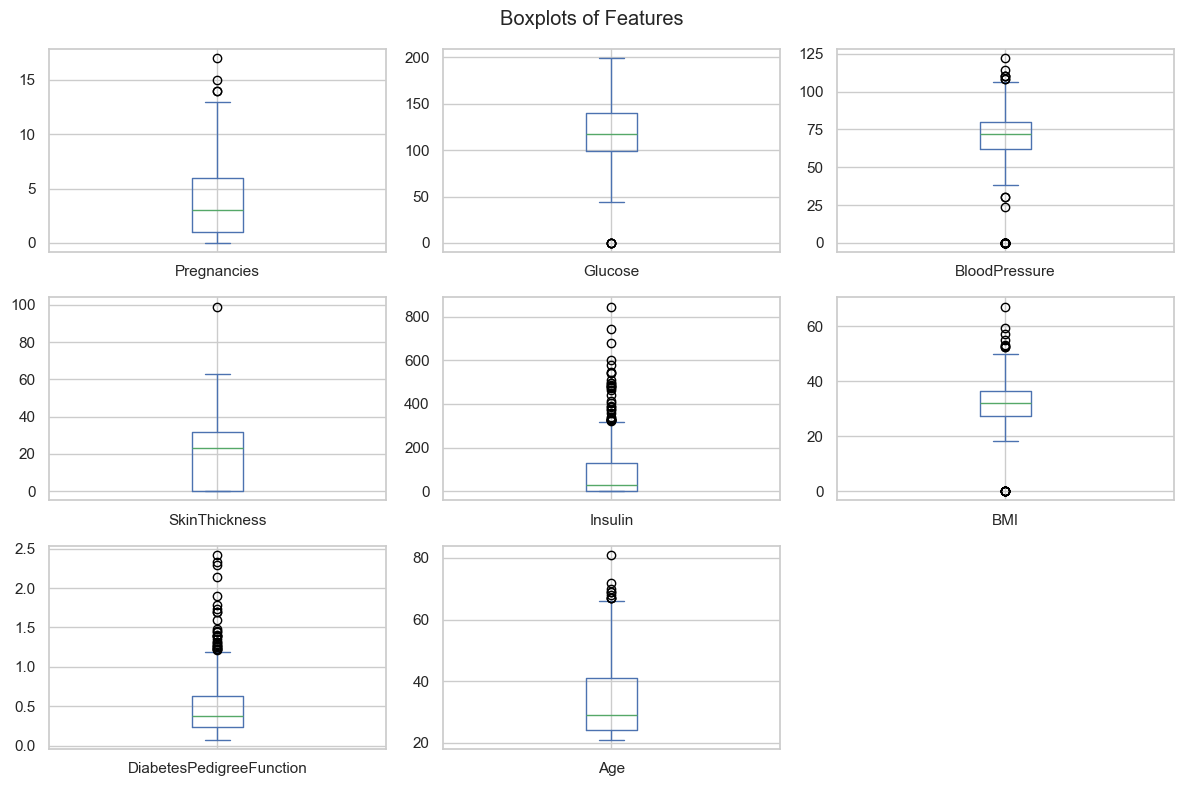

In [21]:
sns.set(style="whitegrid")
df.drop('Outcome', axis=1).plot(kind='box', subplots=True, layout=(3,3), figsize=(12,8))
plt.suptitle("Boxplots of Features")
plt.tight_layout()
plt.show()

In [8]:
# Function to remove outliers using IQR
def remove_outliers_iqr(data, columns):
    df_cleaned = data.copy()
    for col in columns:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    return df_cleaned

# Apply IQR method to all numeric columns except the target
features = df.columns.drop('Outcome')
df_no_outliers = remove_outliers_iqr(df, features)

# Check how many rows remain
print(f"Original rows: {df.shape[0]}, After removing outliers: {df_no_outliers.shape[0]}")

Original rows: 768, After removing outliers: 636


In [9]:
# Features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Normalize the feature values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## KNN

In [13]:
# Train the KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
# Predict and evaluate
y_pred = knn.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6948051948051948

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.58      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.69      0.69      0.69       154


Confusion Matrix:
 [[79 20]
 [27 28]]


## SVM

In [16]:
from sklearn.svm import SVC

In [17]:
# Create and train SVM classifier
svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [18]:
# Predict on test data
y_pred = svm_clf.predict(X_test_scaled)

In [19]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7337662337662337

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

